#**Group Project: Income Prediction**

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


### Import labraries

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python

#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time


#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

Python version: 3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
pandas version: 1.1.5
matplotlib version: 3.2.2
NumPy version: 1.19.5
SciPy version: 1.4.1
IPython version: 5.5.0
scikit-learn version: 1.0.1
-------------------------


In [ ]:
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/DMGroup/cleaned_adult.csv')
#df = pd.read_csv('/content/sample_data/adult.csv')
df= pd.read_csv('cleaned_adult.csv')

### Models

In [ ]:
# Import some evaluation functions
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score,roc_auc_score, classification_report, recall_score, f1_score
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve, plot_roc_curve, roc_curve, plot_confusion_matrix

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

Using CNN for the cells below:

In [ ]:
# Import important libraries
import torch
from torch import nn
from torch.utils import data

# Import standard Scalar:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('income', axis=1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=30)

In [ ]:
# Convert training and test dataframes to tensors:
X_train.shape
X_train= sc.fit_transform(X_train)
X_test= sc.fit_transform(X_test)

#X_train_t=torch.tensor(X_train.values,dtype= torch.float32) 
#y_train_t=torch.tensor(y_train.values,dtype= torch.float32) 
#X_test_t=torch.tensor(X_test.values,dtype= torch.float32) 
#y_test_t= torch.tensor(y_test.values,dtype= torch.float32) 

X_train_t= torch.from_numpy(X_train)
X_train_t= X_train_t.type(torch.float32)
y_train_t=torch.tensor(y_train.values,dtype= torch.float32) 
X_test_t=torch.from_numpy(X_test)
X_test_t=X_test_t.type(torch.float32)
y_test_t= torch.tensor(y_test.values,dtype= torch.float32) 

y_train_t= y_train_t.reshape(-1, 1)
y_test_t= y_test_t.reshape(-1, 1)

def load_array(data_arrays, batch_size, is_train=True):  
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 100
train_iter = load_array((X_train_t, y_train_t), batch_size)
test_iter = load_array((X_test_t, y_test_t), batch_size)

# Define the neural network
input_shape=X_train_t.shape[1]
print("Input shape is: ",input_shape)
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # layers here
        self.l1 = nn.Linear(input_shape,32)
        self.l2 = nn.Linear(32,64)
        self.l3 = nn.Linear(64,1)

        self.batchnorm1 = nn.BatchNorm1d(32)
        self.batchnorm2 = nn.BatchNorm1d(64)
        #self.dropout = nn.Dropout(p=0.05)

    def forward(self, x):    
        x = torch.relu(self.l1(x))
        x = self.batchnorm1(x)
        x = torch.relu(self.l2(x))
        x = self.batchnorm2(x)
        #x= self.dropout(x)
        x = torch.sigmoid(self.l3(x))
        return x
# The output of the neural network is a sigmoid function(range from 0 to 1) which makes the network suitable for binary classification.

#Set the parameters
learning_rate = 0.01
num_epochs = 40
# Model , Optimizer, Loss
model = Net()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
criterion = nn.BCELoss()
#criterion= nn.BCEWithLogitsLoss()
# Binary Cross Entropy loss is the standard loss function used for binary classification


Input shape is:  42


cuda:0
Loss for each epoch is:  0.5125096847956208
Loss for each epoch is:  0.3840554188151926
Loss for each epoch is:  0.353446065466066
Loss for each epoch is:  0.34090093760198104
Loss for each epoch is:  0.33668822124314945
Loss for each epoch is:  0.3298367484547626
Loss for each epoch is:  0.32494783795428
Loss for each epoch is:  0.32091102980334185
Loss for each epoch is:  0.3213519536215684
Loss for each epoch is:  0.31804226373118916
Loss for each epoch is:  0.316157093107472
Loss for each epoch is:  0.31475616357792385
Loss for each epoch is:  0.31328721909687435
Loss for each epoch is:  0.31226412660774144
Loss for each epoch is:  0.3112395200807016
Loss for each epoch is:  0.3099645005103729
Loss for each epoch is:  0.30999717824303785
Loss for each epoch is:  0.308643379601939
Loss for each epoch is:  0.3070020586594768
Loss for each epoch is:  0.3075178859905265
Loss for each epoch is:  0.3062357868842238
Loss for each epoch is:  0.3069479523719042
Loss for each epoch is

Text(0.5, 1.0, 'Training Loss vs Epoch')

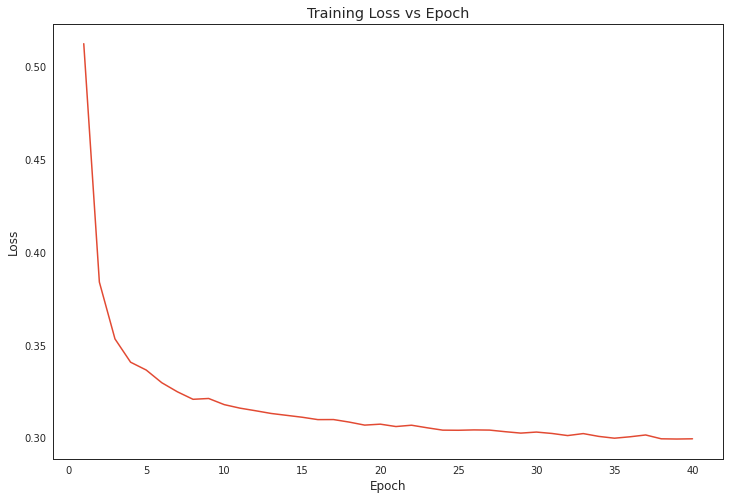

In [ ]:
# Training the CNN:

device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
print(device)
model.to(device)
model.train()
Loss=[]
Epoch=[]
ite=0
for epoch in range(num_epochs):
  epoch_loss = 0
  ite +=1
  for i, (Data, labels) in enumerate(train_iter):
        #images = Variable(images)
        #labels = Variable(labels)
        Data =  Data.to(device)
        labels  =  labels.to(device)
        #ite +=1
        
        optimizer.zero_grad()
        outputs = model(Data)
        loss = criterion(outputs, labels)
        epoch_loss +=loss.item()
        loss.backward()
        optimizer.step()
  print("Loss for each epoch is: ",epoch_loss/len(train_iter))
  Loss.append(epoch_loss/len(train_iter))

  Epoch.append(ite)

plt.plot(Epoch,Loss )
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training Loss vs Epoch')


In [ ]:
# Testing the CNN:
model.eval()
true_preds, num_preds = 0., 0.

y_pred_list=[]
with torch.no_grad():
    for i, (X_batch,y_batch) in enumerate (train_iter):
        X_batch = X_batch.to(device)
        y_batch= y_batch.to(device)
        y_train_pred = model(X_batch)
        #y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_train_pred)

        true_preds += (y_pred_tag == y_batch).sum()
        num_preds += y_batch.shape[0]

        #y_pred_list.append(y_pred_tag.cpu().numpy())

#y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
#y_pred_list
acc= true_preds / num_preds
print("Train accuracy is: ",acc.item())

Train accuracy is:  0.8641738295555115


In [ ]:
# Testing the CNN:
model.eval()
true_preds, num_preds = 0., 0.

y_pred_list=[]
with torch.no_grad():
    for i, (X_batch,y_batch) in enumerate (test_iter):
        X_batch = X_batch.to(device)
        y_batch= y_batch.to(device)
        y_test_pred = model(X_batch)
        #y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)

        true_preds += (y_pred_tag == y_batch).sum()
        num_preds += y_batch.shape[0]

        #y_pred_list.append(y_pred_tag.cpu().numpy())

#y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
#y_pred_list
acc= true_preds / num_preds
print("Test accuracy is: ",acc.item())

Test accuracy is:  0.8490710854530334
